In [ ]:
!pip install -U scikit-learn

In [1]:
import os
from os import path,listdir
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.inspection import PartialDependenceDisplay,partial_dependence

import requests
import pickle
import json

pd.options.display.max_columns = 500
import warnings
warnings.filterwarnings("ignore")

map_all = {'staphylococci':'$\it{Staphylococcus}$ spp.',
         'enterobacterales':'Enterobacterales',
         'enteros':'Enterobacterales',
         'fungi':'Fungi',
          'enterococci':'$\it{Enterococcus}$ spp.',
          'streptococci':'$\it{Streptococcus}$ spp.',
          'gram.neg':'Other Gram-negative bacteria',
          'anaerobic':'Anaerobic bacteria',
           'age':'Age',
           'duree':'Duration of surgery',
           'bmi':'BMI [kg/m²]',
           'surg':'Type of surgery',
           'asa':'ASA score',
           'class':'Wound contamination',
           'clindamycine':'Clindamycine',
           'cephalosporin.all':'Cephalosporine',
           'glycopeptide':'Glycopeptide',
           'quinolone':'Quinolone',
           'elective':'Elective procedure',
           'endo_2L':'Minimally invasive procedure',
           'nitroimidazole':'Nitroimidazole',
           'penicillin.all':'Penicilin',
           'carbapenem':'Carbapenem',
           'SAP.b':'SAP administered (yes / no)',
           'hosp_size':'Hospital size',
           'sex':'Sex',
           'other.SAP2':'Other SAP',
           'prev.hosp.b':'Hospitalization prior to surgery'}

def plot_pdp(dd,estimators,_X = 'ft_age',_Y = 'ft_bmi',title='',pdf=None):
    _X2,_Y2 = [map_all.get(x.replace('ft_',''),x.replace('ft_','').title()) for x in (_X,_Y)]
    _X2,_Y2 = [x+' (norm)' if (x.startswith('Age') or 
                               x.startswith('BMI') or 
                               x.startswith('Dur')) else x for x in (_X2,_Y2)]
    fig,axs = plt.subplots(figsize=(18.5,4),ncols=4)
    for idx,(name,E) in enumerate(estimators.items()):    
        ax = axs[idx]
        display = PartialDependenceDisplay.from_estimator(E, dd, [(_X, _Y)])
        display.plot(ax=ax, contour_kw={'cmap':'viridis'})
        display.axes_[0,0].set_xlabel(_X2)
        display.axes_[0,0].set_ylabel(_Y2)
        display.axes_[0,0].set_title(name)
    fig.suptitle(title,y=1.05)
    if pdf is not None:
        pdf.savefig(fig,bbox_inches='tight', pad_inches=.1)
    plt.show()  
    
url_group = 'https://raw.githubusercontent.com/HugoGuillen/microbialcomposition/main/clf_group.model'
url_label = 'https://raw.githubusercontent.com/HugoGuillen/microbialcomposition/main/clf_label.model'
url_prep = 'https://raw.githubusercontent.com/HugoGuillen/microbialcomposition/main/preprocessor.pickle'
url_input = 'https://raw.githubusercontent.com/HugoGuillen/microbialcomposition/main/template.xlsx'
url_labels = 'https://raw.githubusercontent.com/HugoGuillen/microbialcomposition/main/labels.json'
modelfile_group = 'model.group'
modelfile_label = 'model.label'
modelfile_prep = 'model.preprocessor'
modelinput = 'input.xlsx'
modellabels = 'labels.json'

# 1 - Download data from repository

In [2]:
response = requests.get(url_group)
with open(modelfile_group, 'wb') as file:
    file.write(response.content)
print('#Downloaded',modelfile_group)

response = requests.get(url_label)
with open(modelfile_label, 'wb') as file:
    file.write(response.content)
print('#Downloaded',modelfile_label)

response = requests.get(url_prep)
with open(modelfile_prep, 'wb') as file:
    file.write(response.content)
print('#Downloaded',modelfile_prep)

response = requests.get(url_input)
with open(modelinput, 'wb') as file:
    file.write(response.content)
print('#Downloaded',modelinput)

response = requests.get(url_labels)
with open(modellabels, 'wb') as file:
    file.write(response.content)
print('#Downloaded',modellabels)

#Downloaded model.group
#Downloaded model.label
#Downloaded model.preprocessor
#Downloaded input.xlsx
#Downloaded labels.json


# 2 - Load variables

In [3]:
with open(modelfile_prep,'rb') as f:
    preprocessor = pickle.load(f)
with open(modelfile_group,'rb') as f:
    clf_group = pickle.load(f)
with open(modelfile_label,'rb') as f:
    clf_label = pickle.load(f)
with open(modellabels,'rb') as f:
    labels = json.load(f)
    
### Get estimators
estimators = { map_all.get(col_name.replace('GROUP_',''),col_name.replace('GROUP_','').title()) : estimator 
                           for col_name, estimator in zip(labels['groups'], clf_group.estimators_)}

# 3 - Predict input data and plot

<font color="red">Download the file `input.xlsx` and fill with your own patient data. Then, re upload it to replace the existing `input.xlsx`.</font>

---
## Data dictionary

| ft_age                      | Age (years)                                                      |
| --------------------------- | ---------------------------------------------------------------- |
| ft_bmi                      | BMI (kg/m<sup>2</sup>)                                           |
| ft_duree                    | Expected duration of surgery (minutes)                           |
| ft_asa_1                    | ASA score 1 (1 = yes, 0 = no)                                    |
| ft_asa_2                    | ASA score 2 (1 = yes, 0 = no)                                    |
| ft_asa_3                    | ASA score 3 (1 = yes, 0 = no)                                    |
| ft_asa_4                    | ASA score 4 (1 = yes, 0 = no)                                    |
| ft_asa_5                    | ASA score 5 (1 = yes, 0 = no)                                    |
| ft_class_Clean              | Wound contamination class = clean (1 = yes, 0 = no)              |
| ft_class_Clean-Contaminated | Wound contamination class = clean-contaminated (1 = yes, 0 = no) |
| ft_class_Contaminated       | Wound contamination class = contaminated (1 = yes, 0 = no)       |
| ft_class_Dirty/Infected     | Wound contamination class = dirty/infected (1 = yes, 0 = no)     |
| ft_hosp_size_200-499        | Hospital size of 200-499 beds (1 = yes, 0 = no)                  |
| ft_hosp_size_500+           | Hospital size of >500 beds (1 = yes, 0 = no)                     |
| ft_hosp_size_<200           | Hospital size of <200 beds (1 = yes, 0 = no)                     |
| ft_surg_Cholecystectomy     | Cholecystectomy (1 = yes, 0 = no)                                |
| ft_surg_Colorectal surgery  | Colorectal surgery (1 = yes, 0 = no)                             |
| ft_surg_Heart surgery       | Heart surgery (1 = yes, 0 = no)                                  |
| ft_surg_Hernia surgery      | Hernia surgery (1 = yes, 0 = no)                                 |
| ft_surg_Hip replacement     | Hip replacement (1 = yes, 0 = no)                                |
| ft_surg_Knee replacement    | Knee replacement (1 = yes, 0 = no)                               |
| ft_surg_Spinal surgery      | Spinal surgery (1 = yes, 0 = no)                                 |
| ft_carbapenem               | Carbapenem (1 = yes, 0 = no)                                     |
| ft_cephalosporin.all        | Cephalosporine (1 = yes, 0 = no)                                 |
| ft_clindamycine             | Clindamycine (1 = yes, 0 = no)                                   |
| ft_elective                 | Elective surgery (1 = yes, 0 = no)                               |
| ft_endo_2L                  | Minimally invasive surgery (1 = yes, 0 = no)                     |
| ft_glycopeptide             | Glycopeptide (1 = yes, 0 = no)                                   |
| ft_implant                  | Implant (1 = yes, 0 = no)                                        |
| ft_nitroimidazole           | Nitroimidazole (1 = yes, 0 = no)                                 |
| ft_other.SAP2               | Other SAP, not listed here (1 = yes, 0 = no)                     |
| ft_penicillin.all           | Penicillin (1 = yes, 0 = no)                                     |
| ft_quinolone                | Quinolone (1 = yes, 0 = no)                                      |
| ft_SAP.b                    | Any SAP (1 = female, 0 = male)                                   |
| ft_sex                      | Sex (1 = female, 0 = male)                                       |

Predicted bacterial groups: GROUP_staphylococci
Predicted bacteria: LABEL_staphylococci


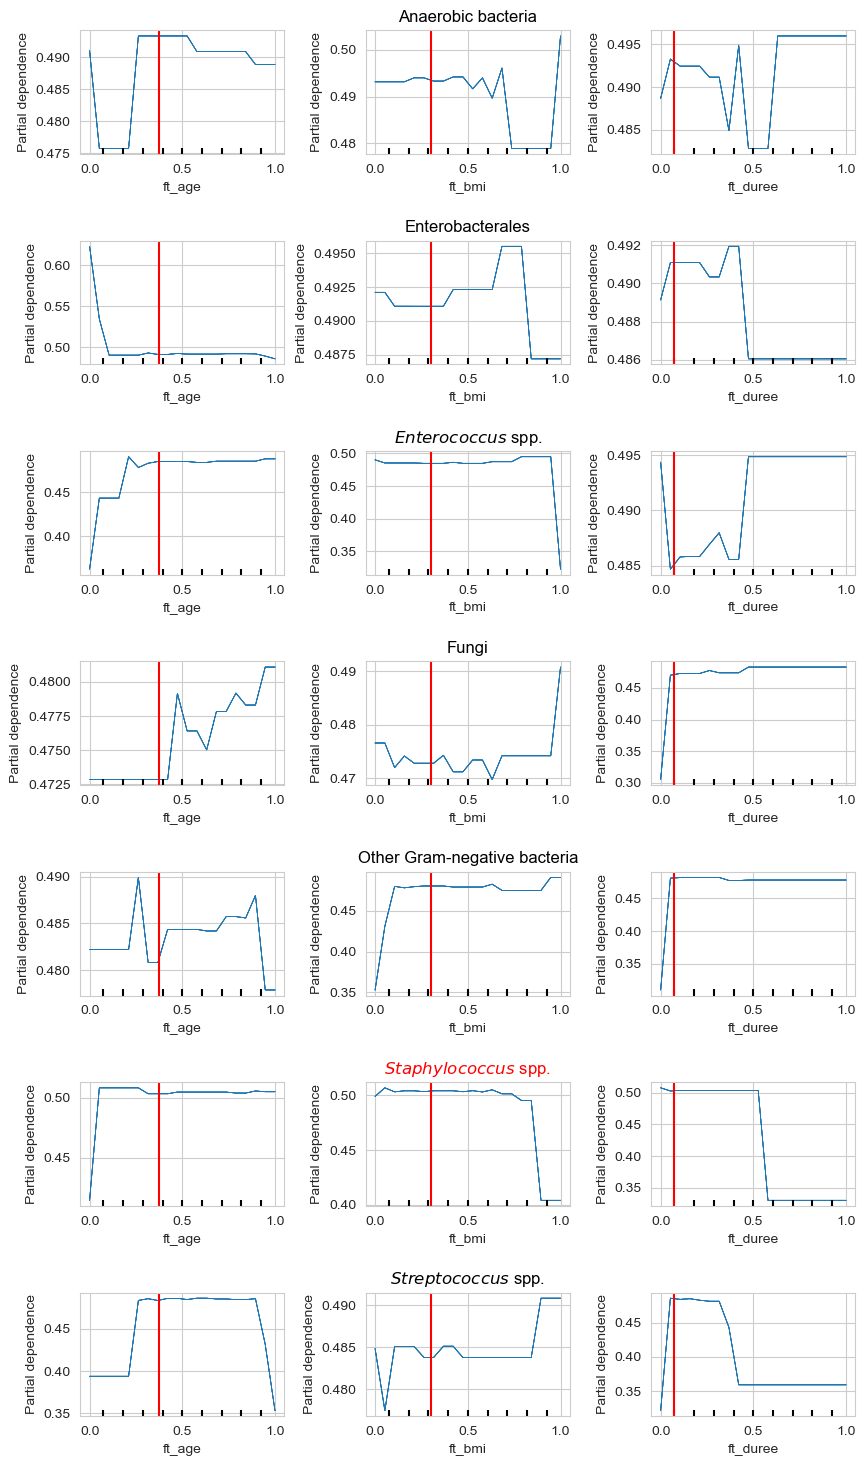

In [7]:
df = pd.read_excel(modelinput)
### Normalize
columns_prep = ['ft_age','ft_bmi','ft_duree']
df[columns_prep] = preprocessor.transform(df)
for c in columns_prep:
    df[c] = df[c].apply(lambda x:1 if x>1 else 0 if x<0 else x)

### Predict
dl = pd.DataFrame(clf_label.predict(df))
dl.columns = labels['labels']
dg = pd.DataFrame(clf_group.predict(df))
dg.columns = labels['groups']

z1 = dg.T.reset_index()
z1 = list(z1[z1[0]==1]['index'])
print('Predicted bacterial groups:',', '.join(z1))
z2 = dl.T.reset_index()
z2 = list(z2[z2[0]==1]['index'])
# print('Predicted bacteria:',', '.join(z2))


sns.set_style('whitegrid')
N = 20
fig,axs = plt.subplots(figsize=(10,18),ncols=3,nrows=len(estimators))
# axs = axs.flatten()
for row,(k,v) in enumerate(estimators.items()):
    for idx,c in enumerate(['ft_age','ft_bmi','ft_duree']):
        dt = pd.concat([df] * N, ignore_index=True)
        dt[c] = np.linspace(0,1,N)    
        ax = axs[row,idx]
        display = PartialDependenceDisplay.from_estimator(v, dt, [c],kind='individual',ax=ax)    
        ax2 = display.axes_[0][0]    
        ax2.axvline(x=df[c].iloc[0],color='red')
        if idx==1:
            color = 'red' if dg.iloc[0,row]==1 else 'black'
            ax.set_title(k,color=color)
plt.subplots_adjust(wspace=0.4,hspace=0.7)
plt.savefig('ICE.pdf',bbox_inches='tight', pad_inches=.1)
plt.show()